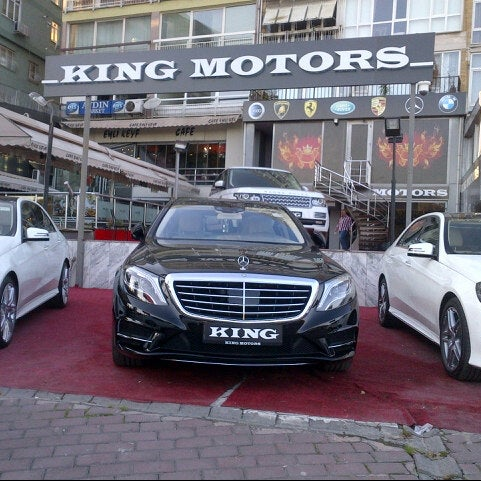

Below is an analysis of a car dealership inventory dataset which we purpose to analyze how various variables may be used to predict car prices.

Variables such as:

*   Price of the car
*   Year of make
*   Engine volume
*   Mileage

The insights are meant to inform decisions such as:

1. Price setting ➖ ➕

2. Cash flow prediction ⏩

3. Unearthing potential revenue earners ⏫

4. Inventory management 💻

Let's Go!

In [ ]:
#import pandas library

import pandas as pd

In [ ]:
#import the dataset and convert it from .xlsx to .csv file format

file_path='/content/5.21.+Regression_Analysis_practical_example.xlsx'
df=pd.read_excel(file_path) #load file on a dataframe

csv_file_path = 'output_csv_file.csv'
df.to_csv(csv_file_path, index=False) #save as a csv file

In [ ]:
csv_file_path = 'output_csv_file.csv'
df.to_csv(csv_file_path, index=False)

In [ ]:
#glimpse the dataset

df.head(6)

,Unnamed: 0,Regression analysis,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Brand,Price,log_price,Mileage,log_mileage,EngineV,Year
3,NaN,Mercedes-Benz,222000,5.346353,1,0,6.3,2016
4,NaN,Mercedes-Benz,177000,5.247973,1,0,5.5,2016
5,NaN,Mercedes-Benz,177777,5.249876,1,0,5.5,2016


**DATA CLEANING**

In [ ]:
#drop first 2 blank rows

df = df.drop([0, 1]) 

In [ ]:
#reset the indexing of the dataset

df = df.reset_index(drop=True) 
df.head(3)

,Unnamed: 0,Regression analysis,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Brand,Price,log_price,Mileage,log_mileage,EngineV,Year
1,NaN,Mercedes-Benz,222000,5.346353,1,0,6.3,2016
2,NaN,Mercedes-Benz,177000,5.247973,1,0,5.5,2016


In [ ]:
df.columns = df.iloc[0] #make fields in row 0 the field titles

df = df.drop(0) #drop row 0

df.head(3)

,NaN,Brand,Price,log_price,Mileage,log_mileage,EngineV,Year
1,NaN,Mercedes-Benz,222000,5.346353,1,0,6.3,2016
2,NaN,Mercedes-Benz,177000,5.247973,1,0,5.5,2016
3,NaN,Mercedes-Benz,177777,5.249876,1,0,5.5,2016


In [ ]:
df = df.dropna(axis=1, how='all') #drop the field Nan as it tells nothing

df = df.reset_index(drop=True)
df.head()

,Brand,Price,log_price,Mileage,log_mileage,EngineV,Year
0,Mercedes-Benz,222000,5.346353,1,0,6.3,2016
1,Mercedes-Benz,177000,5.247973,1,0,5.5,2016
2,Mercedes-Benz,177777,5.249876,1,0,5.5,2016
3,Mercedes-Benz,199999,5.301028,1,0,5.5,2016
4,Mercedes-Benz,199999,5.301028,1,0,5.5,2016


In [ ]:
 #drop 'log_mileage' as it reads 0 which may affect our analysis.
    
 #use 1 instead as it's a small increment and makes little difference in a mileage context

df = df.drop('log_mileage', axis=1)
df = df.reset_index(drop=True)
df.head()

,Brand,Price,log_price,Mileage,EngineV,Year
0,Mercedes-Benz,222000,5.346353,1,6.3,2016
1,Mercedes-Benz,177000,5.247973,1,5.5,2016
2,Mercedes-Benz,177777,5.249876,1,5.5,2016
3,Mercedes-Benz,199999,5.301028,1,5.5,2016
4,Mercedes-Benz,199999,5.301028,1,5.5,2016


In [ ]:
#drop null values across  the dataset

df = df.dropna()
df.info() #get the datatypes of the resulting values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4003 entries, 0 to 4002
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        4003 non-null   object
 1   Price        4003 non-null   object
 2   log_price    4003 non-null   object
 3   Mileage      4003 non-null   object
 4   log_mileage  4003 non-null   object
 5   EngineV      4003 non-null   object
 6   Year         4003 non-null   object
dtypes: object(7)
memory usage: 219.0+ KB


In [ ]:
#get sum of all null values per field

print(df.isnull().sum())

log_price        0
Mileage          0
log_mileage      0
EngineV          0
Year             0
BMW              0
Mercedes-Benz    0
Mitsubishi       0
Renault          0
Toyota           0
Volkswagen       0
dtype: int64


**DATA ANALYSIS**

In [ ]:
#let's see which brands we have

df['Brand'].unique()

array(['Mercedes-Benz', 'Toyota', 'BMW', 'Volkswagen', 'Audi',
       'Mitsubishi', 'Renault'], dtype=object)

Since we want to do a linear regression, it makes sense to create dummy variables for 'Brand'.

e.g., if a car is a BMW=1, else=0.
Then we will manage to see how much impact a brand has on the price.

In [ ]:
# Create dummy variables for the 'Brand' column

brand_dummies = pd.get_dummies(df['Brand'], drop_first=True)

#drop_first=True helps manage multicollinearity i.e., we deduct one brand from the dummies(n-1)

# append the dummy variables with the original DataFrame to become one dataset

df = pd.concat([df, brand_dummies], axis=1)
df = df.drop('Brand', axis=1)
df = df.reset_index(drop=True)
df.head()

,Price,log_price,Mileage,log_mileage,EngineV,Year,BMW,Mercedes-Benz,Mitsubishi,Renault,Toyota,Volkswagen
0,222000,5.346353,1,0,6.3,2016,0,1,0,0,0,0
1,177000,5.247973,1,0,5.5,2016,0,1,0,0,0,0
2,177777,5.249876,1,0,5.5,2016,0,1,0,0,0,0
3,199999,5.301028,1,0,5.5,2016,0,1,0,0,0,0
4,199999,5.301028,1,0,5.5,2016,0,1,0,0,0,0


Audi was omitted after maintaining the n-1 rule, thus it will be used as a reference when comparing brand impact.

It also means if a car is not a 'Mercedes-Benz', 'Toyota', 'BMW', 'Volkswagen', 'Mitsubishi' or 'Renault', then it must be an AUDI!

**LOG_PRICE AND MILEAGE**

In [ ]:
#let's see the impact of mileage on price, how much of price can we preict from the mileage?

import statsmodels.api as sm

 # 'coerce' will handle any non-numeric values by converting them to NaN

df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['log_price'] = pd.to_numeric(df['log_price'], errors='coerce')
df = df.dropna(subset=['Mileage', 'log_price'])

X = df['Mileage']  # Independent variable (Mileage)

y = df['log_price']  # Dependent variable (Logarithm of Price)

# Add a constant term to the independent variable

X = sm.add_constant(X)

# Fit the regression model

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     2148.
Date:                Tue, 06 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:33:00   Log-Likelihood:                -1203.5
No. Observations:                4003   AIC:                             2411.
Df Residuals:                    4001   BIC:                             2424.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4668      0.010    462.195      0.0

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


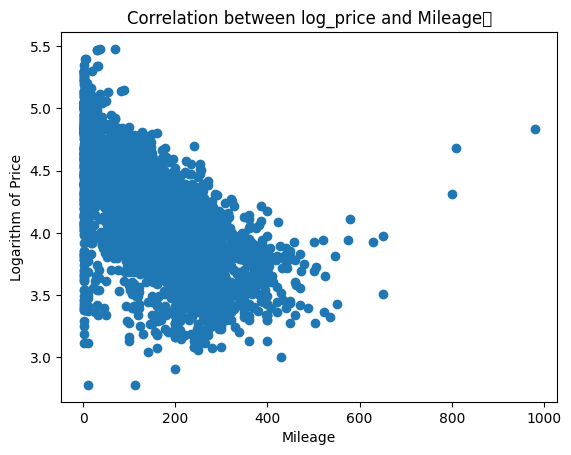

In [ ]:
# plot a scatter plot to visualize correlation

import matplotlib.pyplot as plt
plt.scatter(df['Mileage'], df['log_price'])
plt.title('Correlation between log_price and Mileage	')
plt.xlabel('Mileage')
plt.ylabel('Logarithm of Price')
plt.show()

In [ ]:
#get the inverse of resulting log_price

import numpy as np

log_value = 0.0023
antilog_value = np.exp(log_value)

print(antilog_value)

1.002302647029


The model above is a summary of the relationsip between  mileage and log_price.

The variables have a -ve relationship, as one hikes the other dips.

The coefficient value of mileage is -0.0023.

When mileage increases, price decreases by 1.0023 units(read -1.2b=-1.2*b)

Adjusted R^2 value shows mileage affects/causes change in price by 34%

There are a few outliers however with high mileage and sold at a high price, low mileage at an extremely low price, this may be influenced by brand/performance.

**LOG_PRICE AND ENGINE VOLUME**

In [ ]:
#let's evaluate how engine volume affects price

df['EngineV'] = pd.to_numeric(df['EngineV'], errors='coerce') #convert datatype object to integer

X = df['EngineV']  # Independent variable (EngineV)

y = df['log_price']  # Dependent variable (Logarithm of Price)

# Add a constant term to the independent variable

X = sm.add_constant(X)

# Fit the regression model

model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     1047.
Date:                Sun, 04 Feb 2024   Prob (F-statistic):          3.50e-204
Time:                        11:31:05   Log-Likelihood:                -1598.6
No. Observations:                4003   AIC:                             3201.
Df Residuals:                    4001   BIC:                             3214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6214      0.016    233.419      0.0

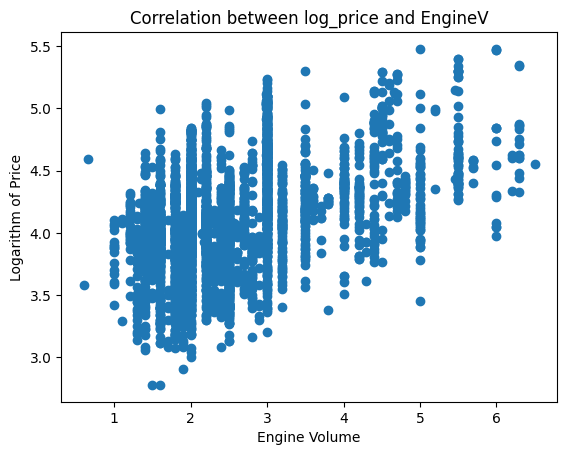

In [ ]:
# plot a scatter plot to visualize correlation

import matplotlib.pyplot as plt

plt.scatter(df['EngineV'], df['log_price'])
plt.title('Correlation between log_price and EngineV')
plt.xlabel('Engine Volume')
plt.ylabel('Logarithm of Price')
plt.show()

In [ ]:
log_value=0.1892
exponential_log=np.exp(log_value)
print(exponential_log)

1.2082825848358283


The p-value shows our test is statisticallly significant.

Our null hypothesis is there is an effect on price caused by engine value, confirmed by a p-value of 0.000.

Adjusted R^2 is 0.207 reflecting engine value causes 20.7% change in price.

The coefficient of engine volume is 0.1892 and its inverse is 1.208 which translates to each unit increase in engine volume leads an increase in price by 1.2 units,(read 1.2b=1.2*b)

There are few outliers however with low engine low volumes at a high selling price and high engine volumes at a low selling price, ofcourse with the influence of other factors.

**LOG_PRICE AND YEAR OF MAKE**

In [ ]:
#let's standardize our 'Year' and 'EngineV' variables to reduce multi-collinearity as they are under different scales

#scales hereby measure of time (Y) differs from other numerals.

from sklearn.preprocessing import StandardScaler
numerical_features = ['Year', 'EngineV']

# Initialize StandardScaler

scaler = StandardScaler()

# Fit and transform the numerical features

df[numerical_features] = scaler.fit_transform(df[numerical_features])

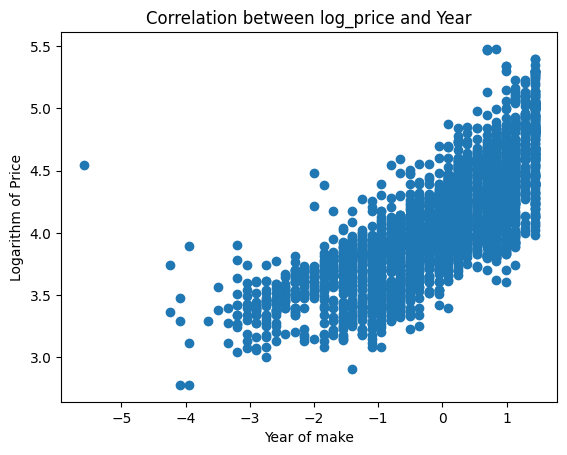

In [ ]:
#visualize correlation between price and Year of make

#test how we can predict price by year of make

plt.scatter(df['Year'], df['log_price'])
plt.title('Correlation between log_price and Year')
plt.xlabel('Year of make')
plt.ylabel('Logarithm of Price')
plt.show()

In [ ]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce') #convert datatype object to integer

X = df['Year']  # Independent variable (Year)

y = df['log_price']  # Dependent variable (Logarithm of Price)

# Add a constant term to the independent variable

X = sm.add_constant(X)

# Fit the regression model

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     5117.
Date:                Tue, 06 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:48:51   Log-Likelihood:                -415.18
No. Observations:                4003   AIC:                             834.4
Df Residuals:                    4001   BIC:                             846.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0882      0.004    963.415      0.0

Adjusted R^2 shows Year of make affects  50% of selling price.

The plot shows a majority idea that the newer the car the higher it's price.,
with an exception of say Vintage cars(old but expensive).

The p-value shows our test is significant, Year of make does have an impact over car price.

The inverse of log_price interpreted via coefficient of Year, reflects an increment in Year affects car price by 1.35 units, read(1.35b=1.35*b)

In [ ]:
#transform the resulting log_price to it's inverse

log_value=0.3035
exponential_log=np.exp(log_value)
print(exponential_log)

1.3545915909420276


**LOG_PRICE AND BRAND**

In [ ]:
#let's see how the Brand 'BMW' affects the car price

X = df['BMW']  # Independent variable (BMW)

y = df['log_price']  # Dependent variable (Logarithm of Price)

# Add a constant term to the independent variable

X = sm.add_constant(X)

# Fit the regression model

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     26.79
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           2.38e-07
Time:                        17:26:10   Log-Likelihood:                -2050.4
No. Observations:                4003   AIC:                             4105.
Df Residuals:                    4001   BIC:                             4117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0739      0.007    585.202      0.0

Adjusted R^2 says the Brand BMW causes 0.6% in selling price. A BMW car will be 0.6% more expensive than an Audi(our reference car,remember).

P-value confirms our test is statistically significant.

In [ ]:
#since we can use log_price, let's drop Price because its data type is object

df.drop(['Price'],axis=1,inplace=True)

**LOG_PRICE AND ALL VARIABLES**

In [ ]:
#let's combine all variables and see how well they can be used to predict price

numeric_cols = df.select_dtypes(include=['float64', 'int64', 'uint8']) #restricts usage of those datatypes only

df['log_mileage'] = pd.to_numeric(df['log_mileage'], errors='coerce')
df = df.dropna(subset=['log_mileage'])

X = df.drop(['log_price'], axis=1)  # Features (independent variables)

y = df['log_price']  # Target (dependent variable)

# Add a constant term to the independent variables

X = sm.add_constant(X)

# Fit the multiple linear regression model

model = sm.OLS(y, X).fit()

# Print the summary of the regression model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     1627.
Date:                Tue, 06 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:21:23   Log-Likelihood:                 1187.8
No. Observations:                4003   AIC:                            -2354.
Df Residuals:                    3992   BIC:                            -2284.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.3265      0.014    310.211

In [ ]:
#inverse the log_price to interpret the results in a clearer way

# Extract the coefficients from the model summary

coefficients = model.params

# Take the exponential of each coefficient to get the inverse of the log

inverse_coefficients = np.exp(coefficients)

# Print the results

print("Inverse of Log Coefficients:")
for variable, inverse_coefficient in zip(coefficients.index, inverse_coefficients):
    print(f"{variable}: {inverse_coefficient:.4f}")

Inverse of Log Coefficients:
const: 75.6765
Mileage: 0.9998
log_mileage: 0.9197
EngineV: 1.1451
Year: 1.3040
BMW: 1.0526
Mercedes-Benz: 1.0511
Mitsubishi: 0.8934
Renault: 0.8032
Toyota: 0.9775
Volkswagen: 0.9440


The regresssion model explains 80% change in car price, by the R^2 value.

Our test is statistically significant as p-value is closer to 0.

In summary we are statistically significant saying,

1. BMW brand will influence a car's price to be 1.05 times more expensive than an Audi, a Mercedes 1.051 times than an Audi, a Mitsu 0.89 times cheaper than an Audi, a Renault 0.80 times cheaper than an Audi, a Toyota 0.978 times cheaper than an Audi and a Volkswagen 0.944 times more cheaper than our reference Audi.

This insight specifically affects car pricing.

2. Negative coefficients like Mileage suggest their increase will lead to a fall of selling price. They have a negative relationship.

The dealer may choose to have a ceiling on the mileage to maximize profits.

3. This model will help King's Dealers to set competitive car prices and they will be able to isolate unseen oppurtunities using this model in price setting.

4. With this data, the dealer can do targeted marketing highlighting certain features about the cars that will help him/her realize maximized profits and customer satisfaction.

A 2023 BMW, with 1 mileage units, engine volume of 3.9 units is likely to be very expensive as these factors will determine more than 80% of the asking price.

These insights help the dealership cretae margin of errors to accomodate customer retention scenarios like discounts, loyalties & promotions. Based on their KPIs, the dealer will manage their inventory more efficiently.



In [ ]:
df.tail(10)

,log_price,Mileage,log_mileage,EngineV,Year,BMW,Mercedes-Benz,Mitsubishi,Renault,Toyota,Volkswagen
3993,3.290035,94,1.973128,-1.402187,-3.644167,0,0,0,0,0,1
3994,3.112856,1,0.000000,-0.889591,-3.942922,0,0,0,0,0,1
3995,2.778151,112,2.049218,-0.889591,-3.942922,0,0,0,0,0,0
3996,3.890812,230,2.361728,0.340639,-3.942922,0,1,0,0,0,0
3997,3.290035,1,0.000000,-0.479515,-4.092299,0,1,0,0,0,0
3998,2.778151,10,1.000000,-0.992110,-4.092299,0,0,0,0,1,0
3999,3.475671,300,2.477121,0.340639,-4.092299,0,1,0,0,0,0
4000,3.361728,261,2.416641,-0.171957,-4.241677,0,1,0,0,0,0
4001,3.740363,440,2.643453,-0.479515,-4.241677,0,1,0,0,0,0
4002,4.544056,150,2.176091,0.340639,-5.586074,0,1,0,0,0,0
